<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cargar base de datos sinteticas
#https://drive.google.com/file/d/17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB/view?usp=sharing
#id del archivo: 17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB

FILEID = "17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-07-31 18:16:29--  https://docs.google.com/uc?export=download&confirm=&id=17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB
Resolving docs.google.com (docs.google.com)... 172.217.203.113, 172.217.203.138, 172.217.203.101, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-5c-docs.googleusercontent.com/docs/securesc/icusev90ieff8rsir3iljnmbcot04kb3/27qqeedhd1avm8l9k65h8d51d0uuiaoe/1596219375000/11146100322577758036/13398914897206201629Z/17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB?e=download [following]
--2020-07-31 18:16:29--  https://doc-0o-5c-docs.googleusercontent.com/docs/securesc/icusev90ieff8rsir3iljnmbcot04kb3/27qqeedhd1avm8l9k65h8d51d0uuiaoe/1596219375000/11146100322577758036/13398914897206201629Z/17lVU6fkPARDwRSThDR4LCIw5AvdkoIRB?e=download
Resolving doc-0o-5c-docs.googleusercontent.com (doc-0o-5c-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connectin

In [2]:
import os
import sys
Path='/content/CKAPRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

In [12]:
!pip install tf-nightly
import numpy as np
import scipy.io as sio
from CKA_PRI import *
import tensorflow as tf
from sklearn import  datasets
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import accuracy_score,jaccard_score

# **Sinteticas**

**Prueba con Happy**
- Se realiza una prueba en happy con la base de datos fragmentados para probar el funcionamiento de la clase


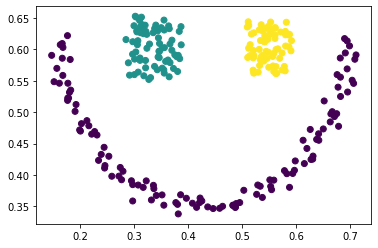

In [4]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

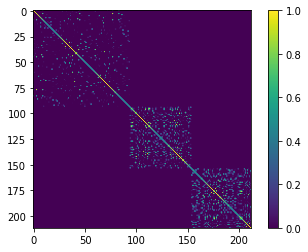

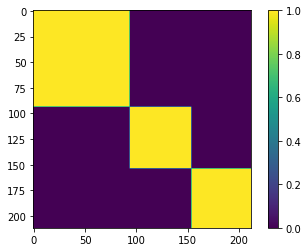

(212, 212)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    happy, labels_happy, test_size=0.2, stratify=labels_happy)
#ejemplo cálculo kernels con tfp
ind = np.argsort(y_train)
Xtrain = X_train[ind]
ytrain = y_train[ind]
xi = tf.convert_to_tensor(Xtrain.reshape(Xtrain.shape[0],-1),dtype=tf.float32)
yi = tf.convert_to_tensor(ytrain.reshape(-1,1),dtype=tf.float32)
#kernel gaussiano tfp
scalar_kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=0.01)
scalar_kernely = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=1e-13)
K = scalar_kernel.matrix(xi, xi)
plt.imshow(K.numpy())
plt.colorbar()
plt.show()

Ky = scalar_kernely.matrix(yi, yi)
plt.imshow(Ky.numpy())
plt.colorbar()
plt.show()
print(K.shape)

Epoch 1/100
2/2 [==============================] - 1s 520ms/step - loss: 1.1730
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 0.7303
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 0.6632
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6264
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 0.5669
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 0.5443
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 0.5306
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 0.5161
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.5075
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 0.5003
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - loss: 0.4906
Epoch 12/100
2/2 [==============================] - 0s 4ms/step - loss: 0.4768
Epoch 13/100
2/2 [==============================] - 0s 8ms/

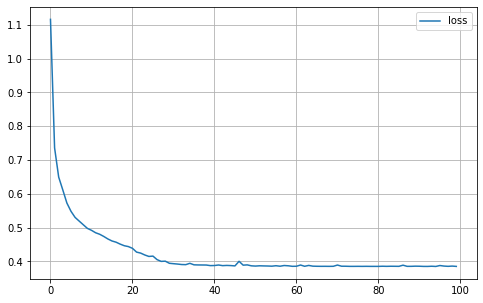

In [10]:
p = PRICKA(K=3,sigmay=0.03)
p.fit(Xtrain,ytrain/1.0)
labels_pre_ = p.predict(X_test)

Ari: 1.0 y accuracy: 1.0


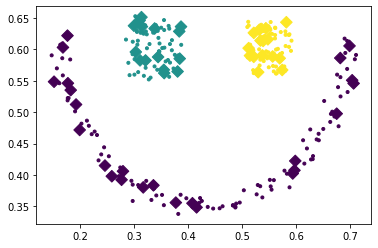

In [14]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=p.labels_, marker='.')
plt.scatter(X_test[:, 0], X_test[:, 1], c=labels_pre_, marker='D',s=68)
Rari_=adjusted_rand_score(y_test,labels_pre_)
Racc_=accuracy_score(y_test,labels_pre_)
print('Ari: '+str(Rari_)+' y'+' accuracy: '+str(Racc_))

**Moons**
- dado que con la base de datos happy se logro comprobar el funcionamiento de la clase, con moons no se partiran los datos

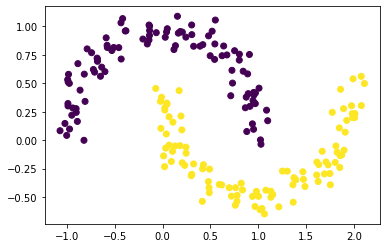

In [60]:
moons,labels_moons = datasets.make_moons(n_samples=200, noise=.085)
plt.scatter(moons[:,0],moons[:,1],c=labels_moons)
Xtrain=moons
ytrain=labels_moons

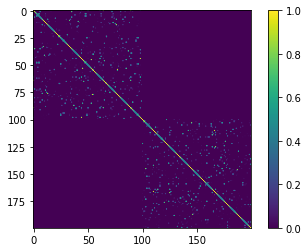

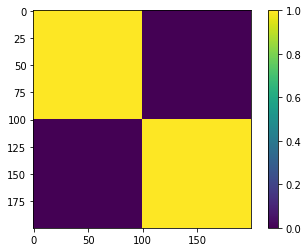

(200, 200)


In [61]:
ind = np.argsort(ytrain)
Xtrain = Xtrain[ind]
ytrain = ytrain[ind]
xi = tf.convert_to_tensor(Xtrain.reshape(Xtrain.shape[0],-1),dtype=tf.float32)
yi = tf.convert_to_tensor(ytrain.reshape(-1,1),dtype=tf.float32)
#kernel gaussiano tfp
scalar_kernel = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=0.05)
scalar_kernely = tfp.math.psd_kernels.ExponentiatedQuadratic(amplitude=1, length_scale=1e-13)
K = scalar_kernel.matrix(xi, xi)
plt.imshow(K.numpy())
plt.colorbar()
plt.show()

Ky = scalar_kernely.matrix(yi, yi)
plt.imshow(Ky.numpy())
plt.colorbar()
plt.show()
print(K.shape)

Epoch 1/100
7/7 [==============================] - 1s 149ms/step - loss: 6.1688
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 4.1992
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 3.5691
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 3.5996
Epoch 5/100
7/7 [==============================] - 0s 2ms/step - loss: 3.3105
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 3.0401
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 2.9812
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 2.7186
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 2.7483
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 2.6029
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 2.7550
Epoch 12/100
7/7 [==============================] - 0s 3ms/step - loss: 2.4107
Epoch 13/100
7/7 [==============================] - 0s 3ms/

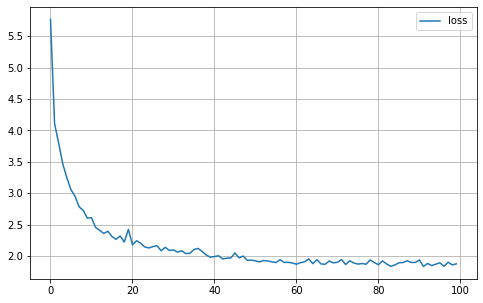

In [66]:
p = PRICKA(K=2,sigmay=0.1,lambda_=0.01,batch_size=32)
p.fit(Xtrain,ytrain/1.0)
labels_pre_ = p.predict(Xtrain)

Ari: 1.0 y accuracy: 1.0


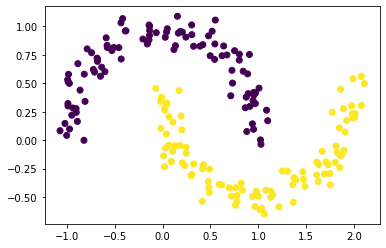

In [67]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=p.labels_)
Rari_=adjusted_rand_score(ytrain,p.labels_)
Racc_=accuracy_score(ytrain,p.labels_)
print('Ari: '+str(Rari_)+' y'+' accuracy: '+str(Racc_))

# **Reales**